In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


### Read the dataset

In [2]:
df = pd.read_csv("Salary Data.csv")

In [3]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
df["Years of Experience"].min()

0.0

### Displays the first five rows in the dataset

In [5]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### Displays the last five rows in the dataset

In [6]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


### List the column names

In [7]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

### Convert the column names to a list

In [8]:
df.columns.tolist()

['Age',
 'Gender',
 'Education Level',
 'Job Title',
 'Years of Experience',
 'Salary']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [10]:
df["Education Level"].value_counts()

Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64

### Get the unique values in the Education Level column and convert to a list

In [11]:
df["Education Level"].unique().tolist()

["Bachelor's", "Master's", 'PhD', nan]

In [12]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [13]:
df.loc[:, df.isnull().any()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [14]:
df[df["Age"].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = df.dropna()
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


Text(0.5, 0, 'Gender')

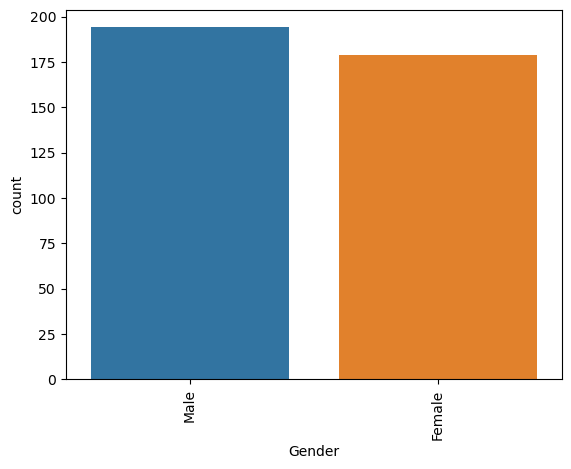

In [16]:
sns.countplot(x='Gender', data=df) 
plt.xticks(rotation="vertical")
plt.xlabel("Gender")

In [17]:
df["Gender"].value_counts()

Male      194
Female    179
Name: Gender, dtype: int64

In [18]:
df["Education Level"].value_counts()

Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64

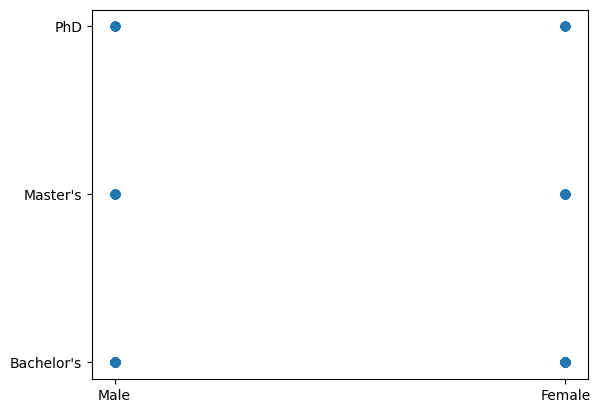

In [19]:
plt.scatter(df["Gender"], df["Education Level"])

In [20]:
df.groupby(["Education Level", "Gender"]).count()

Age  Job Title  Years of Experience  Salary
Education Level Gender                                             
Bachelor's      Female  103        103                  103     103
                Male    121        121                  121     121
Master's        Female   50         50                   50      50
                Male     48         48                   48      48
PhD             Female   26         26                   26      26
                Male     25         25                   25      25

In [21]:
df_gender = df[["Gender", "Education Level", "Salary"]]

In [22]:
df_encoded = pd.get_dummies(df_gender, columns=['Gender', 'Education Level'])

In [23]:
df_encoded

,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD
0,90000.0,0,1,1,0,0
1,65000.0,1,0,0,1,0
2,150000.0,0,1,0,0,1
3,60000.0,1,0,1,0,0
4,200000.0,0,1,0,1,0
...,...,...,...,...,...,...
370,85000.0,1,0,1,0,0
371,170000.0,0,1,0,1,0
372,40000.0,1,0,1,0,0
373,90000.0,0,1,1,0,0


In [24]:
kmeans = KMeans(n_clusters=3).fit(df_encoded)

In [25]:
labels = kmeans.predict(df_encoded)
centroids = kmeans.cluster_centers_

In [26]:
labels

array([0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1,
       0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0,
       2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1,
       0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1,
       0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,

In [27]:
df_encoded["cluster"] = labels

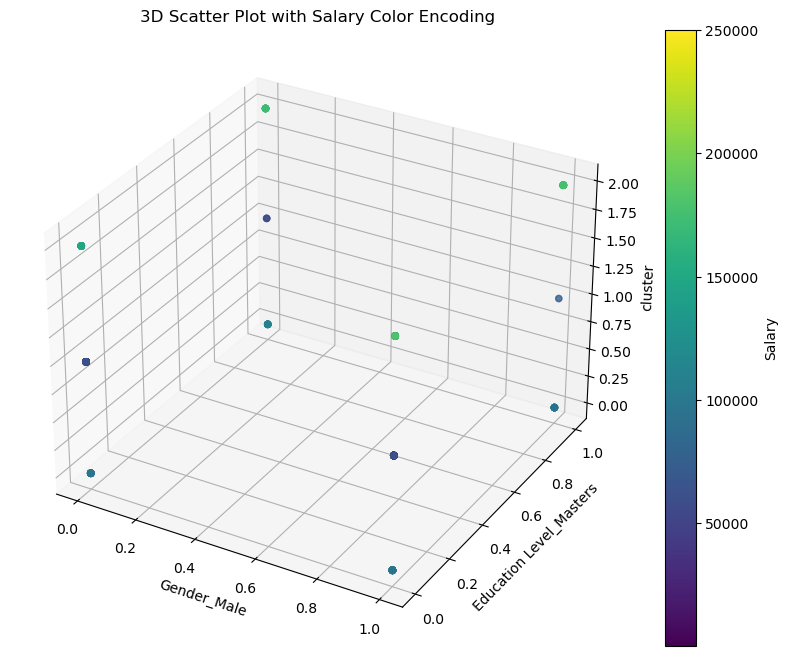

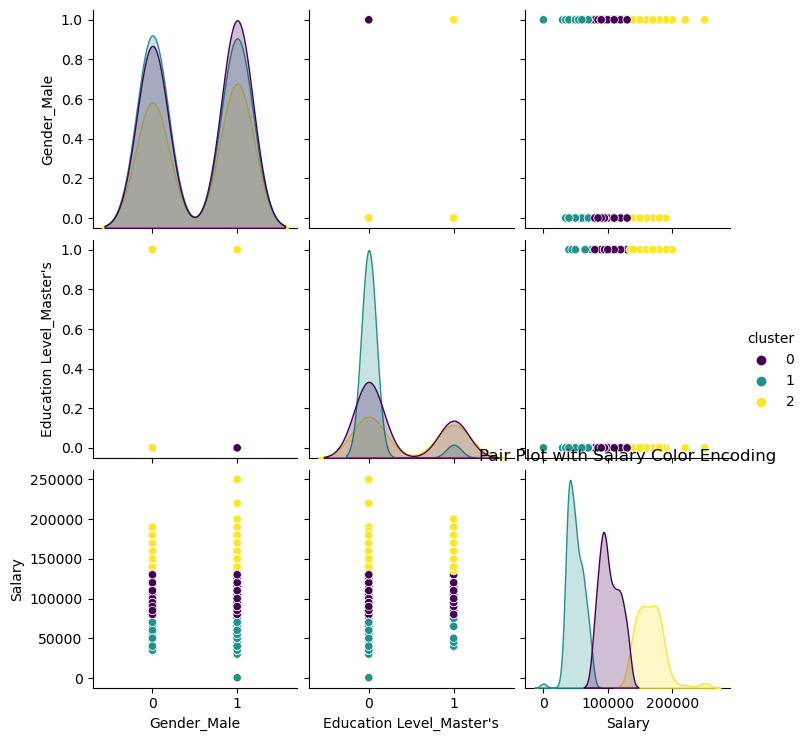

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# 3D Scatter Plot with Salary Color Encoding
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df_encoded['Gender_Male'],
    df_encoded["Education Level_Master's"],
    df_encoded['cluster'],
    c=df_encoded['Salary'],  # Color encoding based on 'Salary'
    cmap='viridis'   # Choose a suitable colormap
)

ax.set_xlabel('Gender_Male')
ax.set_ylabel('Education Level_Masters')
ax.set_zlabel('cluster')

# Add a colorbar to show the Salary range
cbar = plt.colorbar(scatter)
cbar.set_label('Salary')

plt.title('3D Scatter Plot with Salary Color Encoding')
plt.show()

# Pair Plot with Salary Color Encoding
sns.pairplot(df_encoded, hue='cluster', palette='viridis', vars=['Gender_Male', "Education Level_Master's", 'Salary'])
plt.title('Pair Plot with Salary Color Encoding')
plt.show()


In [29]:
df_experience = df[["Education Level", "Years of Experience", "Salary"]]

In [30]:
df_experience = pd.get_dummies(df_experience, columns=['Education Level'])

In [31]:
df_experience

,Years of Experience,Salary,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD
0,5.0,90000.0,1,0,0
1,3.0,65000.0,0,1,0
2,15.0,150000.0,0,0,1
3,7.0,60000.0,1,0,0
4,20.0,200000.0,0,1,0
...,...,...,...,...,...
370,8.0,85000.0,1,0,0
371,19.0,170000.0,0,1,0
372,2.0,40000.0,1,0,0
373,7.0,90000.0,1,0,0


In [32]:
kmeans = KMeans(n_clusters=3).fit(df_experience)

In [33]:
labels = kmeans.predict(df_experience)
centroids = kmeans.cluster_centers_

In [34]:
df_experience["cluster"] = labels

In [35]:
le = LabelEncoder() 

In [36]:
df_experience = df[["Education Level", "Years of Experience", "Salary"]]
df_experience['Education Level']= le.fit_transform(df_experience['Education Level']) 

/var/folders/3m/mgcxpdln3f3dyr243psqlxcw0000gn/T/ipykernel_22479/632435285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_experience['Education Level']= le.fit_transform(df_experience['Education Level'])


In [37]:
kmeans = KMeans(n_clusters=3).fit(df_experience)

In [38]:
labels = kmeans.predict(df_experience)
centroids = kmeans.cluster_centers_

In [39]:
df_experience["cluster"] = labels

/var/folders/3m/mgcxpdln3f3dyr243psqlxcw0000gn/T/ipykernel_22479/3399139989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_experience["cluster"] = labels


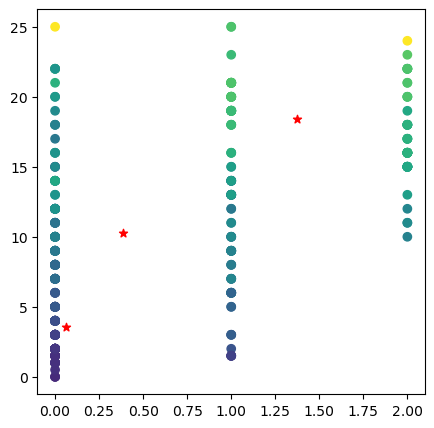

In [40]:
fig = plt.figure(figsize=(5,5))
colmap = {1:"r", 2:"g", 3:"b"}


plt.scatter(df_experience["Education Level"], df_experience["Years of Experience"],  c=df_experience['Salary'], cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], color="red", marker="*")
plt.show()

In [41]:
df_experience["Education Level"].value_counts()

0    224
1     98
2     51
Name: Education Level, dtype: int64

In [42]:
df[df["Salary"] == 350.0]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0


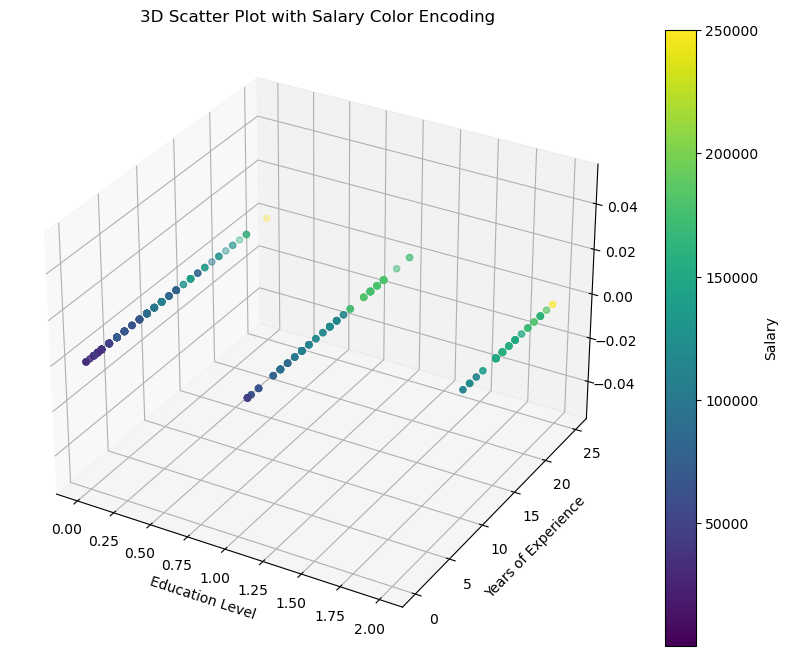

In [43]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df_experience["Education Level"],
    df_experience["Years of Experience"],
    c=df_experience['Salary'])

ax.set_xlabel("Education Level")
ax.set_ylabel('Years of Experience')


# Add a colorbar to show the Salary range
cbar = plt.colorbar(scatter)
cbar.set_label('Salary')

plt.title('3D Scatter Plot with Salary Color Encoding')
plt.show()

In [44]:
df["Job Title"].value_counts()

Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: Job Title, Length: 174, dtype: int64

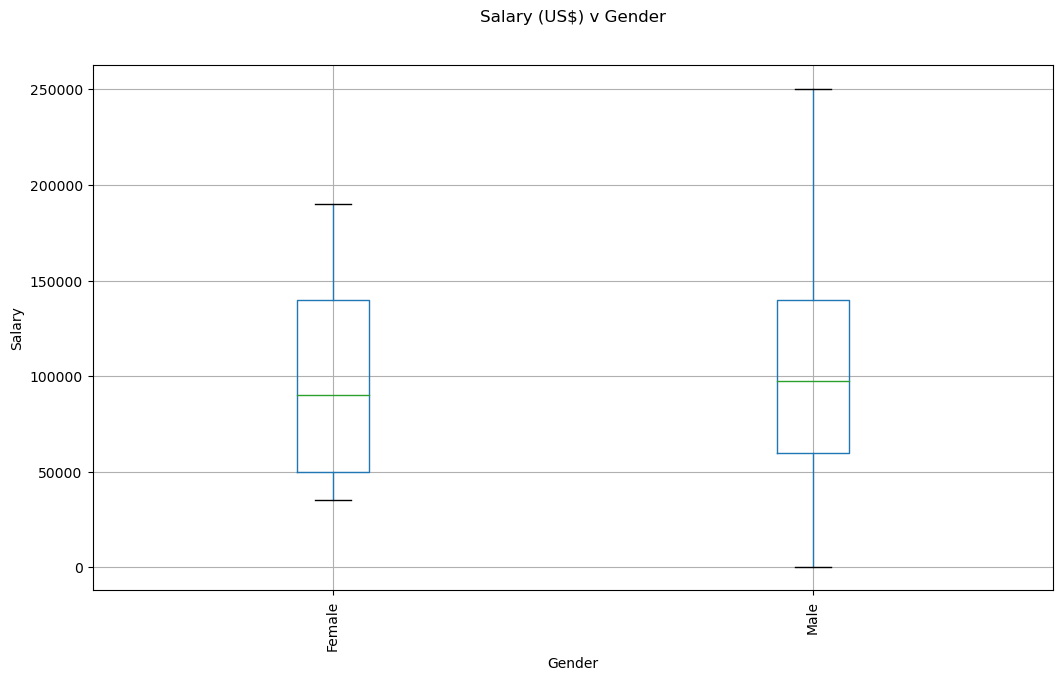

In [45]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Gender', ax=ax)
plt.suptitle('Salary (US$) v Gender')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

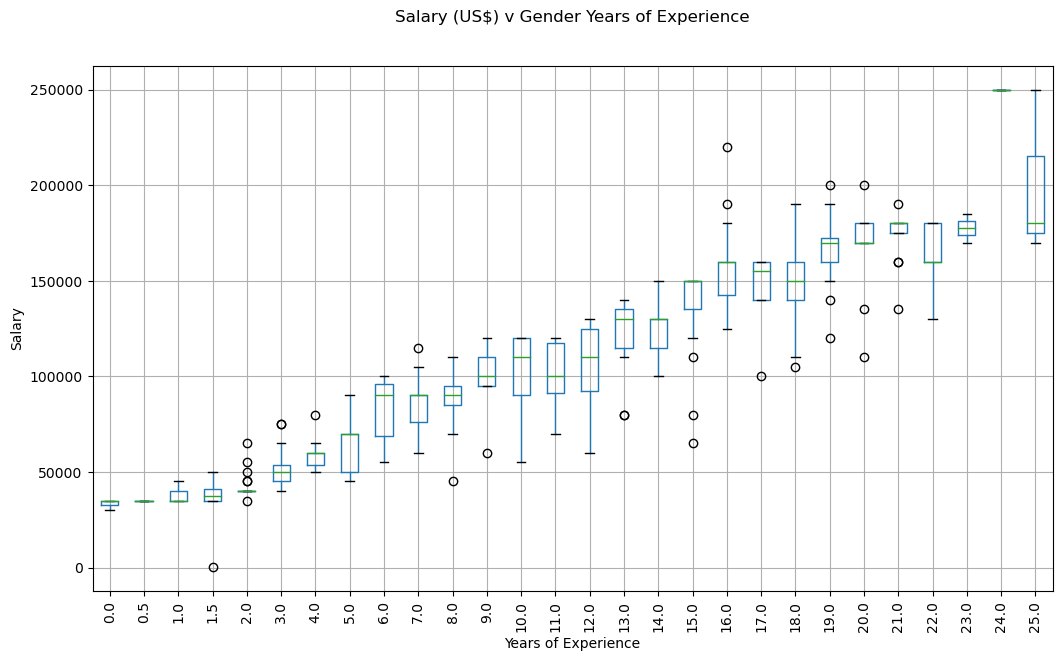

In [46]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Years of Experience', ax=ax)
plt.suptitle('Salary (US$) v Gender Years of Experience')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

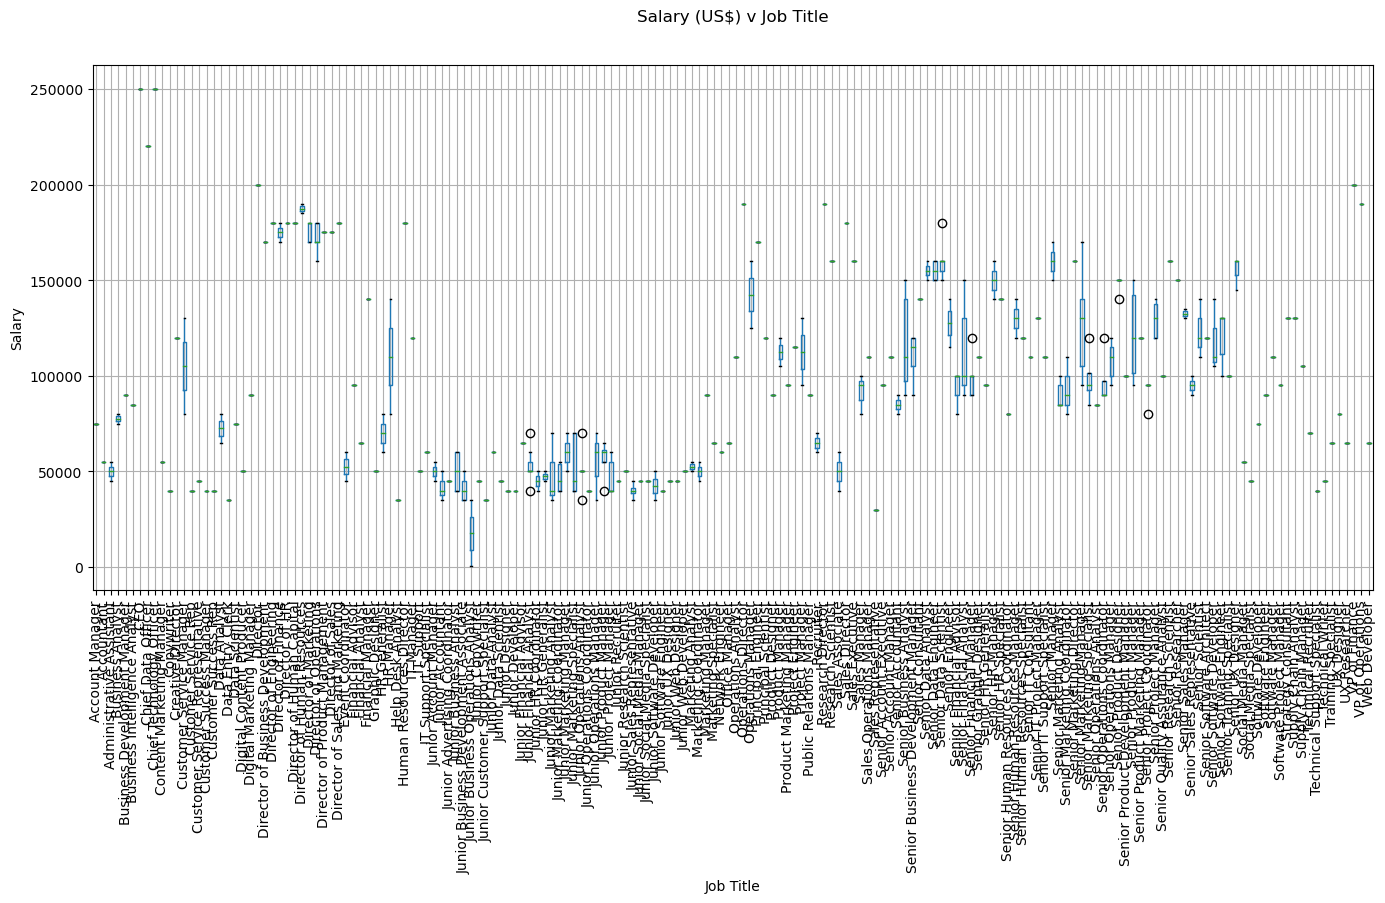

In [47]:
fig, ax = plt.subplots(1,1, figsize=(16, 7))
df.boxplot('Salary', 'Job Title', ax=ax)
plt.suptitle('Salary (US$) v Job Title')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [48]:
junior = df[df["Salary"] < 80000]
junior

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
10,29.0,Male,Master's,Software Developer,3.0,75000.0
...,...,...,...,...,...,...
360,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
363,33.0,Male,Bachelor's,Junior Marketing Specialist,5.0,70000.0
366,31.0,Female,Bachelor's,Junior Financial Analyst,3.0,50000.0
369,33.0,Male,Bachelor's,Junior Business Analyst,4.0,60000.0


In [49]:
junior["Job Title"].value_counts()

Junior Business Analyst                  8
Junior Financial Analyst                 7
Junior Business Development Associate    7
Junior Marketing Coordinator             6
Junior Operations Analyst                5
                                        ..
Technical Recruiter                      1
Sales Representative                     1
Junior Designer                          1
Training Specialist                      1
Junior Financial Advisor                 1
Name: Job Title, Length: 73, dtype: int64

In [50]:
junior["Education Level"].value_counts()

Bachelor's    127
Master's        8
Name: Education Level, dtype: int64

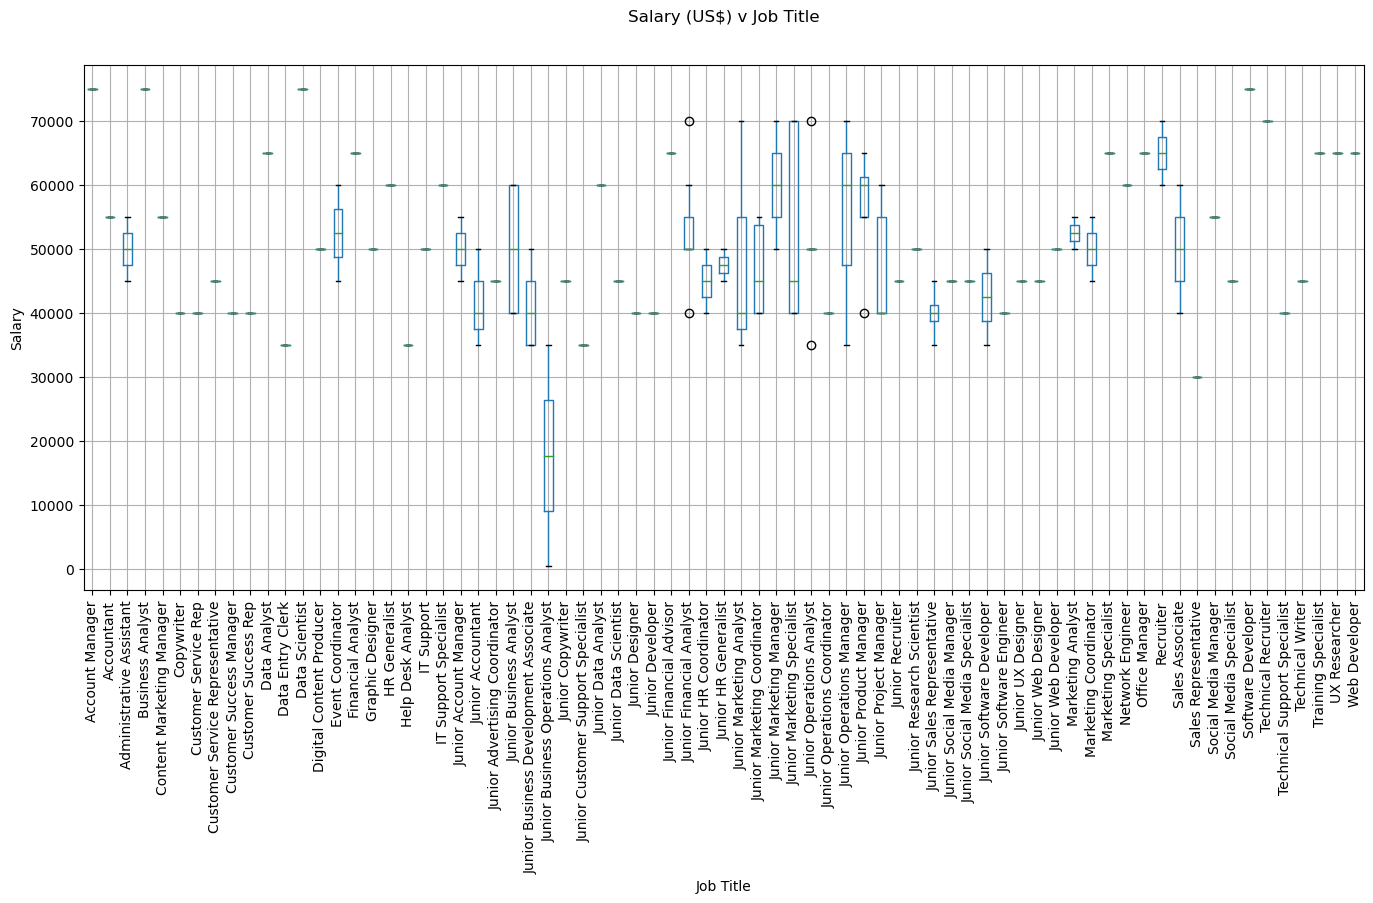

In [51]:
fig, ax = plt.subplots(1,1, figsize=(16, 7))
junior.boxplot('Salary', 'Job Title', ax=ax)
plt.suptitle('Salary (US$) v Job Title')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [52]:
senior = df[(df["Salary"] >= 80000) & (df["Salary"] <= 160000)]
senior

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0
...,...,...,...,...,...,...
367,41.0,Male,Bachelor's,Senior Product Manager,14.0,150000.0
368,44.0,Female,PhD,Senior Data Engineer,16.0,160000.0
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [53]:
senior["Job Title"].value_counts()

Senior Business Analyst     10
Senior Marketing Analyst     9
Senior Marketing Manager     8
Senior Financial Analyst     7
Senior Project Manager       7
                            ..
Senior Manager               1
Supply Chain Analyst         1
Senior HR Generalist         1
Sales Operations Manager     1
Software Project Manager     1
Name: Job Title, Length: 83, dtype: int64

In [54]:
senior["Education Level"].value_counts()

Bachelor's    95
Master's      56
PhD           39
Name: Education Level, dtype: int64

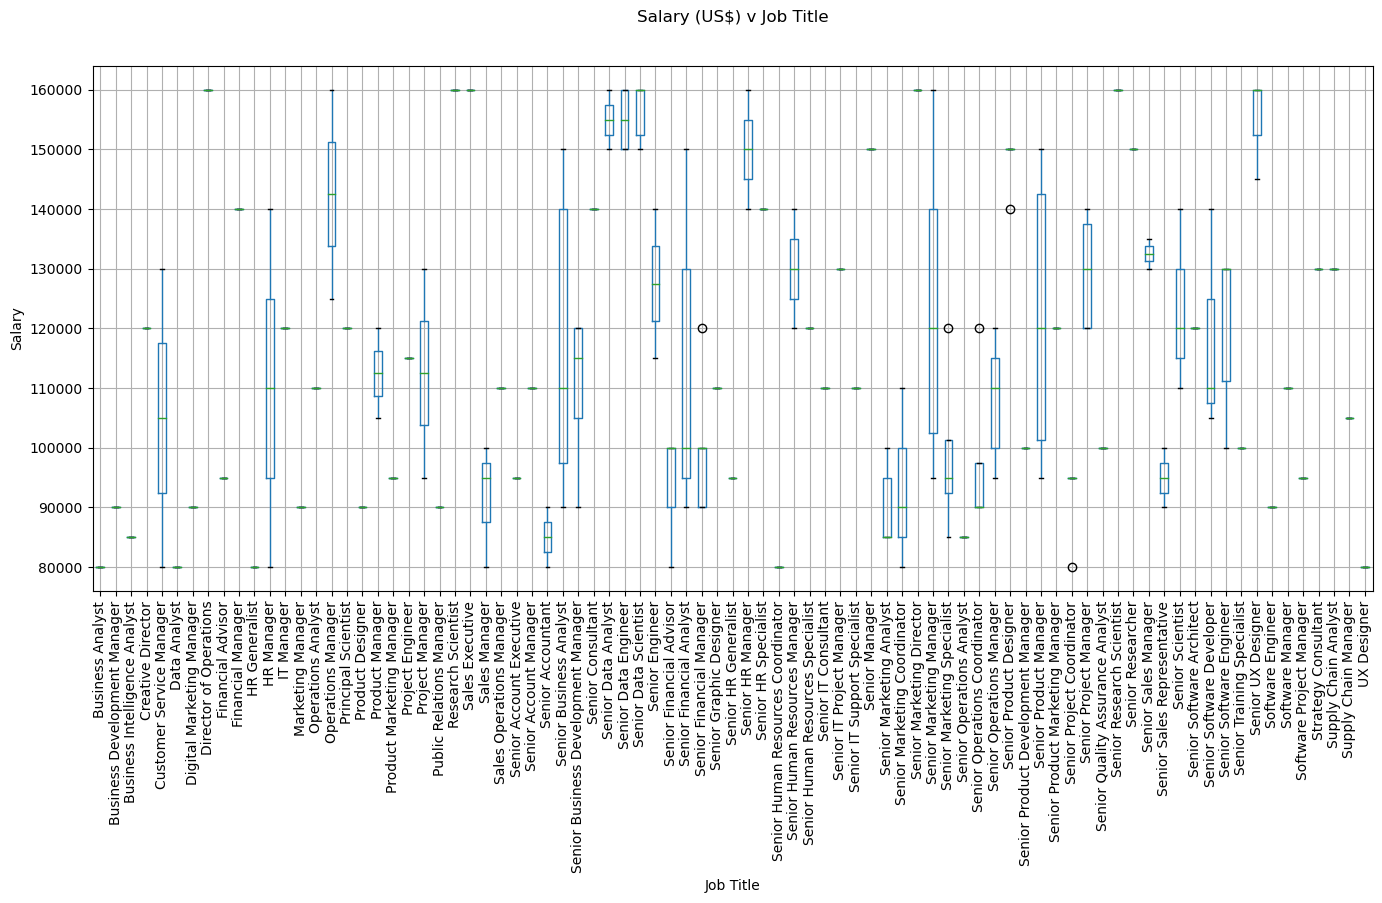

In [55]:
fig, ax = plt.subplots(1,1, figsize=(16, 7))
senior.boxplot('Salary', 'Job Title', ax=ax)
plt.suptitle('Salary (US$) v Job Title')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [56]:
management = df[df["Salary"] > 160000]
management

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
4,52.0,Male,Master's,Director,20.0,200000.0
19,51.0,Male,Bachelor's,Sales Director,22.0,180000.0
21,47.0,Male,Master's,VP of Operations,19.0,190000.0
30,50.0,Male,Bachelor's,CEO,25.0,250000.0
34,46.0,Male,PhD,Senior Manager,20.0,170000.0
41,48.0,Male,Master's,Operations Director,18.0,190000.0
47,45.0,Female,Master's,Director of Marketing,16.0,180000.0
53,47.0,Male,Master's,VP of Finance,19.0,200000.0
60,51.0,Female,Master's,Director of Operations,23.0,170000.0
63,47.0,Male,PhD,Senior Data Scientist,21.0,180000.0


In [57]:
x = df[df["Salary"] == 160000]
x

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
39,49.0,Male,Bachelor's,Sales Executive,21.0,160000.0
76,50.0,Female,Bachelor's,Operations Manager,22.0,160000.0
96,47.0,Male,PhD,Research Scientist,22.0,160000.0
130,50.0,Female,Master's,Director of Operations,21.0,160000.0
133,47.0,Male,PhD,Senior Research Scientist,22.0,160000.0
205,41.0,Female,PhD,Senior Marketing Director,17.0,160000.0
226,46.0,Male,PhD,Senior Data Scientist,18.0,160000.0
240,44.0,Female,PhD,Senior HR Manager,18.0,160000.0
262,46.0,Male,PhD,Senior Data Scientist,18.0,160000.0
276,46.0,Male,PhD,Senior Data Analyst,17.0,160000.0


In [58]:
management["Job Title"].value_counts()

Director of Marketing               12
Director of Operations              10
Director of Engineering              2
Director of Finance                  2
Director of Human Resources          2
Chief Data Officer                   1
Director of HR                       1
Director of Human Capital            1
Director of Business Development     1
Director of Sales and Marketing      1
Director of Product Management       1
Director of Sales                    1
Principal Engineer                   1
Director                             1
Senior Marketing Manager             1
Sales Director                       1
Human Resources Director             1
Research Director                    1
Senior Data Scientist                1
VP of Finance                        1
Operations Director                  1
Senior Manager                       1
CEO                                  1
VP of Operations                     1
Chief Technology Officer             1
Name: Job Title, dtype: i

In [59]:
management["Education Level"].value_counts()

Master's      34
PhD           12
Bachelor's     2
Name: Education Level, dtype: int64

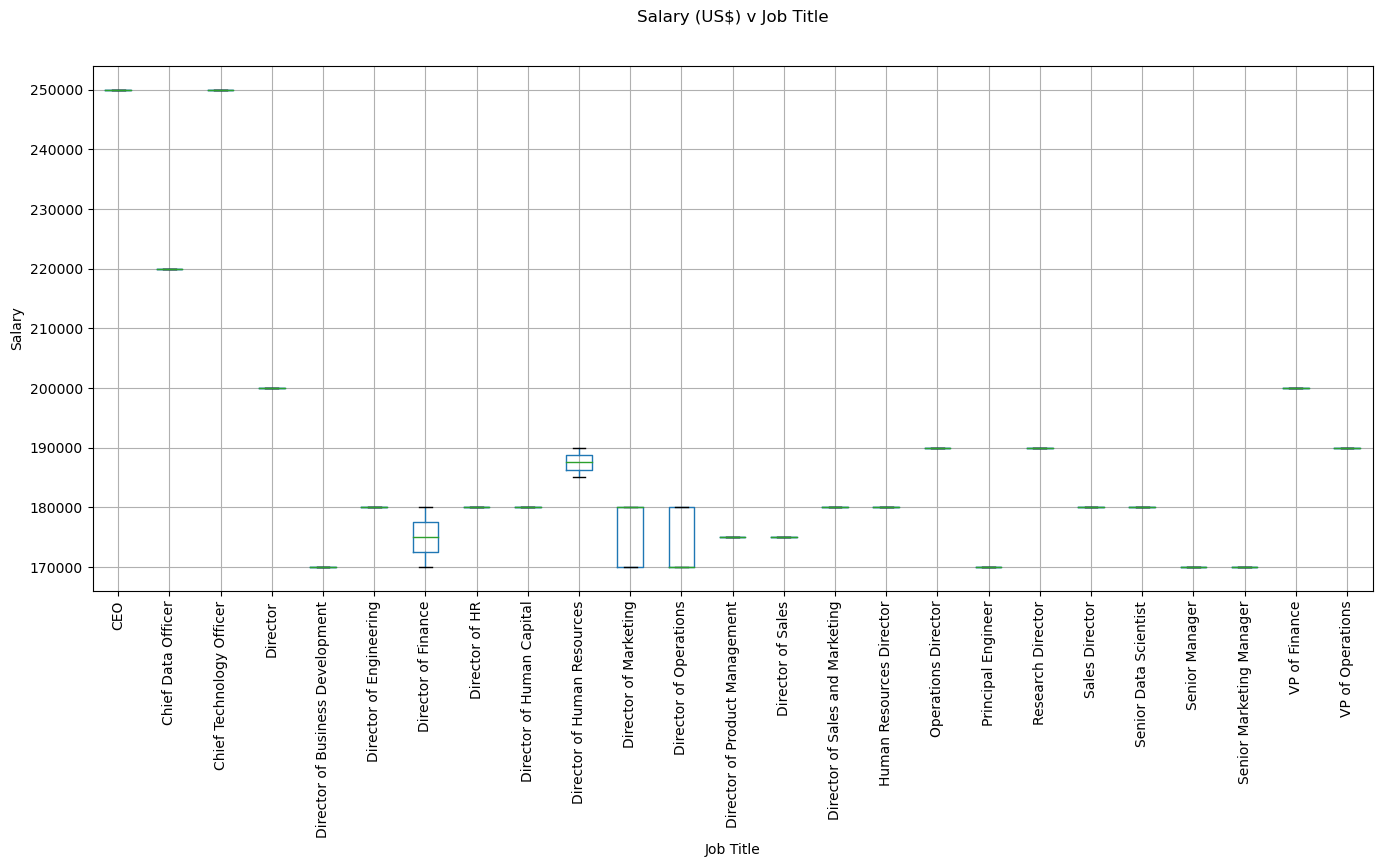

In [60]:
fig, ax = plt.subplots(1,1, figsize=(16, 7))
management.boxplot('Salary', 'Job Title', ax=ax)
plt.suptitle('Salary (US$) v Job Title')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [61]:
def categorize_jobtitle(x):
    if x < 80000:
        return 1
    elif x >= 80000.0 and x < 160000.0:
        return 2
    elif x >= 160000.0:
        return 3

df["Category"] = df["Salary"].apply(categorize_jobtitle)

/var/folders/3m/mgcxpdln3f3dyr243psqlxcw0000gn/T/ipykernel_22479/1059044774.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Category"] = df["Salary"].apply(categorize_jobtitle)


In [62]:
df["Category"].value_counts()

2    173
1    135
3     65
Name: Category, dtype: int64

In [63]:
le_gender = LabelEncoder() 
df["Gender"] = le_gender.fit_transform(df["Gender"])

/var/folders/3m/mgcxpdln3f3dyr243psqlxcw0000gn/T/ipykernel_22479/1088709644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = le_gender.fit_transform(df["Gender"])


In [64]:
from sklearn.preprocessing import LabelEncoder
le_ed = LabelEncoder() 
df["Education Level"] = le_ed.fit_transform(df["Education Level"])

/var/folders/3m/mgcxpdln3f3dyr243psqlxcw0000gn/T/ipykernel_22479/806532314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Education Level"] = le_ed.fit_transform(df["Education Level"])


In [65]:
df["Education Level"].value_counts()

0    224
1     98
2     51
Name: Education Level, dtype: int64

In [66]:
df["Job Title"].value_counts()

Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: Job Title, Length: 174, dtype: int64

In [67]:
X = df.drop(["Salary", "Job Title"], axis=1)
y = df["Salary"]

In [68]:
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 373, dtype: float64

In [69]:
X

,Age,Gender,Education Level,Years of Experience,Category
0,32.0,1,0,5.0,2
1,28.0,0,1,3.0,1
2,45.0,1,2,15.0,2
3,36.0,0,0,7.0,1
4,52.0,1,1,20.0,3
...,...,...,...,...,...
370,35.0,0,0,8.0,2
371,43.0,1,1,19.0,3
372,29.0,0,0,2.0,1
373,34.0,1,0,7.0,2


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
X_train.shape

(261, 5)

In [72]:
minMaxScaler = MinMaxScaler()
X_train = minMaxScaler.fit_transform(X_train)
X_test = minMaxScaler.transform(X_test)

In [73]:
# Model Initialization
lr = LinearRegression()

In [74]:
lr.fit(X_train, y_train)

LinearRegression()

In [75]:
lr.score(X_train, y_train)

0.9437937208367183

In [76]:
y_pred = lr.predict(X_test)
y_pred

array([175770.69916927,  73793.97641676, 123924.47081887,  96975.08444155,
       141548.52350384, 167708.21148189, 166009.22564448, 105217.52046623,
        53817.6551701 , 106530.12455008, 133306.08747915, 168551.17951154,
        36999.86221401,  98221.18233564, 124370.83387313,  53817.6551701 ,
        85481.12885759,  45420.39519202,  91851.15559661, 105663.8835205 ,
       126069.81971054, 112257.09178665, 177289.73666937,  54460.71467255,
        96975.08444155,  44459.31150975, 180251.56851175,  43816.2520073 ,
       115861.98313149, 159176.08774031,  37866.1032436 , 119046.996501  ,
        50409.46027345, 139676.11421817,  99087.42336522,  21383.0825782 ,
       182990.21882699,  50632.64180059, 135598.37474014,  53594.47364297,
        44905.67456402, 101629.37723228, 171066.64829965, 176217.06222353,
        43816.2520073 , 139452.93269104, 119030.24839012,  45308.80442846,
        47224.44690394,  38089.28477073, 165992.4775336 ,  91627.97406948,
       124594.01540026, 1

In [77]:
y_test

329    180000.0
33      65000.0
15     125000.0
316     80000.0
57     140000.0
         ...   
370     85000.0
303    150000.0
336     40000.0
273    180000.0
173    140000.0
Name: Salary, Length: 112, dtype: float64

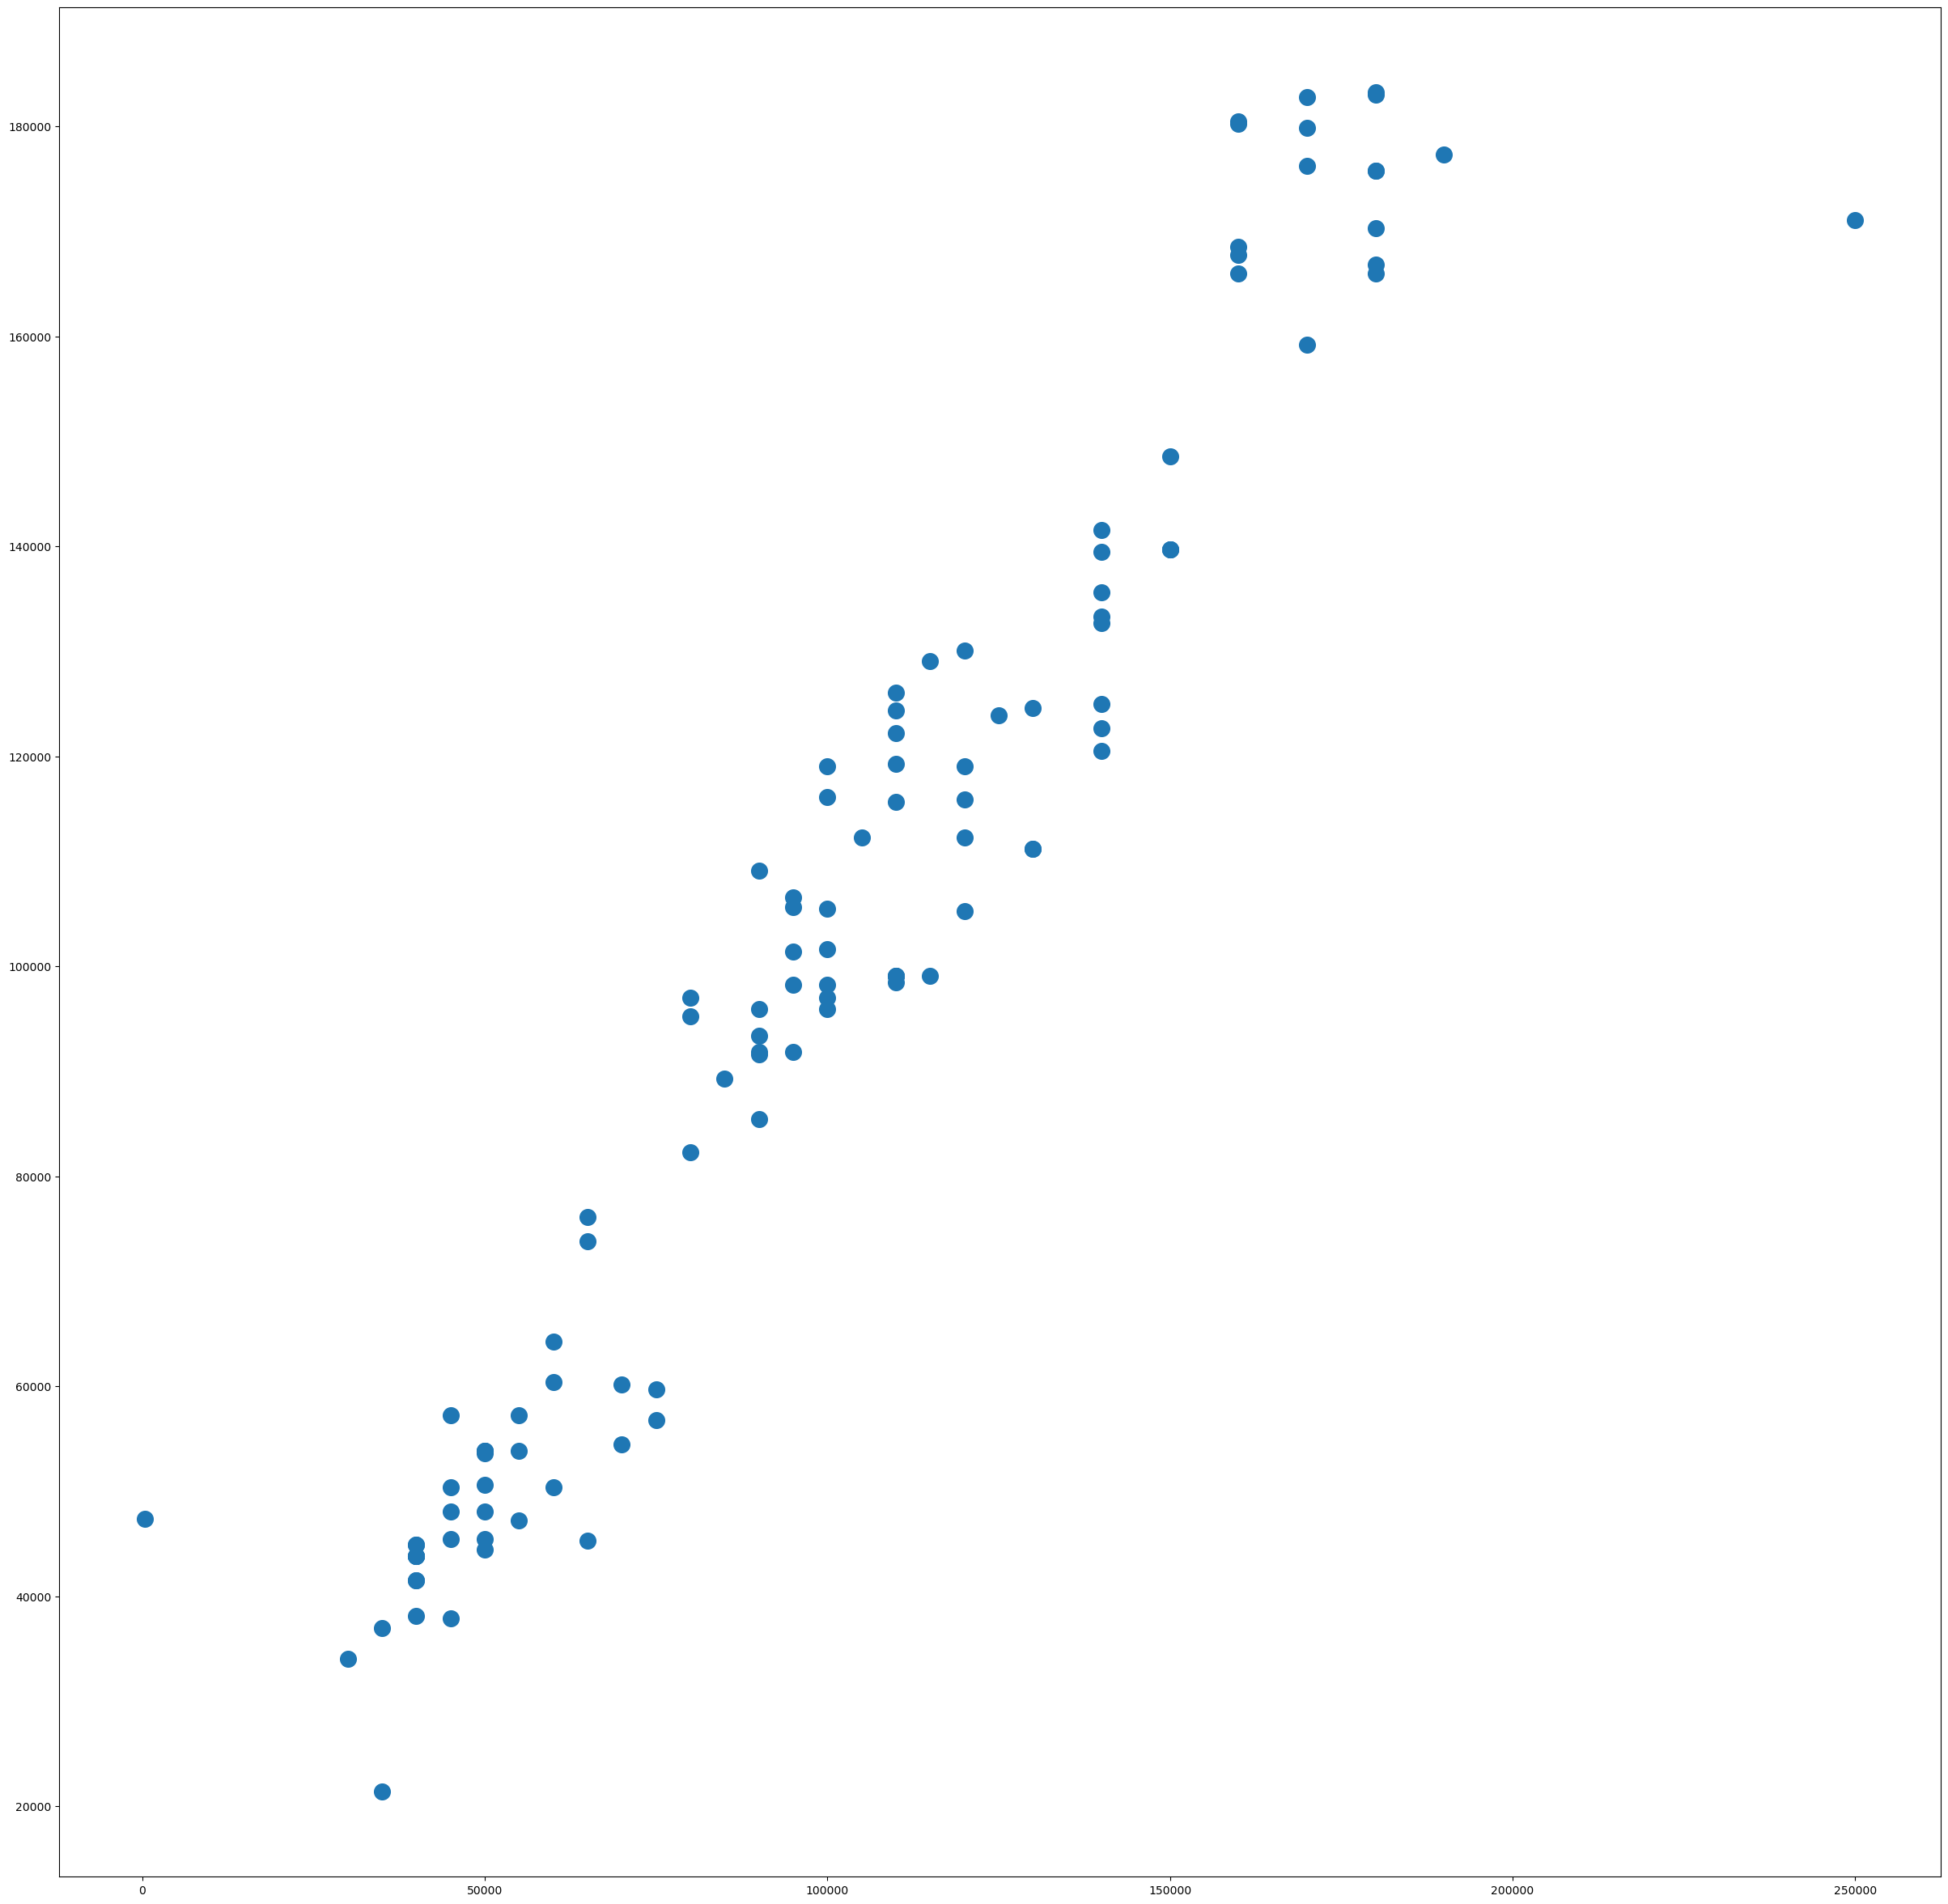

In [78]:
plt.figure(figsize=(30,30))
plt.scatter(y_test, y_pred, s=200)

In [79]:
r2_score(y_test,y_pred)

0.9246795528254762

In [80]:
import pickle

In [81]:
data = {"model": lr, "le_ed": le_ed, "le_gender": le_gender, "df": df, "min": minMaxScaler}
with open("v1.pk1", "wb") as file:
    pickle.dump(data, file)

In [82]:
with open("v1.pk1", "rb") as file:
    data = pickle.load(file)
    
reg = data["model"]
le_ed = data["le_ed"]
le_gender = data["le_gender"]
df = data["df"]
min = data["min"]